Kolkata Knight Riders 140.0
Chennai Super Kings 33.0
Delhi Daredevils 9.0
Royal Challengers Bangalore 5.0
Kolkata Knight Riders 5.0
Rajasthan Royals 6.0
Delhi Daredevils 9.0
Chennai Super Kings 6.0
Rajasthan Royals 3.0
Kings XI Punjab 66.0
Rajasthan Royals 7.0
Chennai Super Kings 9.0
Deccan Chargers 10.0
Kings XI Punjab 4.0
Chennai Super Kings 13.0
Mumbai Indians 7.0
Delhi Daredevils 10.0
Kings XI Punjab 7.0
Rajasthan Royals 45.0
Delhi Daredevils 8.0
Royal Challengers Bangalore 5.0
Kings XI Punjab 9.0
Mumbai Indians 29.0
Rajasthan Royals 8.0
Kings XI Punjab 6.0
Deccan Chargers 7.0
Mumbai Indians 7.0
Chennai Super Kings 4.0
Kolkata Knight Riders 5.0
Rajasthan Royals 8.0
Mumbai Indians 9.0
Chennai Super Kings 18.0
Kolkata Knight Riders 23.0
Rajasthan Royals 3.0
Kings XI Punjab 9.0
Kolkata Knight Riders 23.0
Mumbai Indians 9.0
Kings XI Punjab 41.0
Delhi Daredevils 12.0
Mumbai Indians 8.0
Kings XI Punjab 6.0
Rajasthan Royals 65.0
Mumbai Indians 25.0
Chennai Super Kings 3.0
Delhi Daredevils

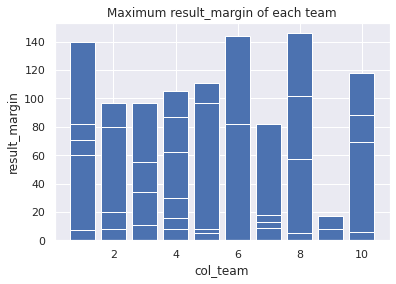

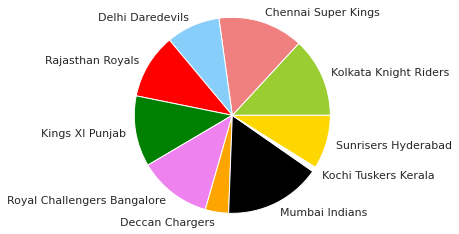

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
ds = pd.read_csv("IPL Matches 2008-2020.csv")


#ds.dropna(axis=0, inplace=True)

col_team = []
col_mar = []
win = np.zeros(11);
    
for i,j in zip(ds['winner'],ds['result_margin']):
    temp = 0
    print(i,j)
    if(i == 'Kolkata Knight Riders' ):
        temp = 1
    elif(i == 'Chennai Super Kings'):
        temp = 2
    elif(i == 'Delhi Daredevils'):
        temp = 3
    elif(i == 'Rajasthan Royals'):
	    temp = 4
    elif(i == 'Kings XI Punjab'):
	    temp = 5
    elif(i =='Royal Challengers Bangalore'):
	    temp = 6
    elif(i == 'Deccan Chargers'):
	    temp = 7
    elif(i == 'Mumbai Indians'):
        temp = 8
    elif(i == 'Kochi Tuskers Kerala'):
        temp = 9
    elif(i == 'Sunrisers Hyderabad'):
        temp = 10
    else:
        continue
    win[temp]+=1    
    col_team.append(temp)
    col_mar.append(j)
labels =   '', 'Kolkata Knight Riders','Chennai Super Kings','Delhi Daredevils','Rajasthan Royals','Kings XI Punjab','Royal Challengers Bangalore','Deccan Chargers', 'Mumbai Indians', 'Kochi Tuskers Kerala','Sunrisers Hyderabad'
plt.bar(col_team,col_mar)
plt.title('Maximum result_margin of each team')
plt.xlabel('col_team')
plt.ylabel('result_margin')
plt.show()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red','green','violet','orange','black','white']
plt.pie(win, labels=labels, colors=colors)

plt.axis('equal')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
os.chdir('/content/sample_data/')
os.getcwd()

'/content/sample_data'

In [ ]:
df_segmentation = pd.read_csv('allrounders.csv',usecols = [i for i in range(5,18)])
df_segmentation.head()

,Matches,Inn_Bat,Inn_Bowld,Runs_Scored,Highest_Score,Bat_Avg,Bat_SR,100s,50s,4s,6s,Balls_Bowld,Runs_Given
0,134,130,105,3575,117,31.09,139.54,4,19,343,177,2029,2682
1,160,88,157,829,64,15.07,138.17,0,1,79,42,3374,3967
2,170,128,142,1927,48,24.09,122.66,0,0,135,65,2495,3152
3,157,81,156,584,24,11.92,111.45,0,0,54,18,3124,4072
4,4,2,4,32,22,32.00,139.13,0,0,0,3,84,94


# New Section

In [ ]:
df_segmentation.describe();

In [ ]:
df_segmentation.corr();

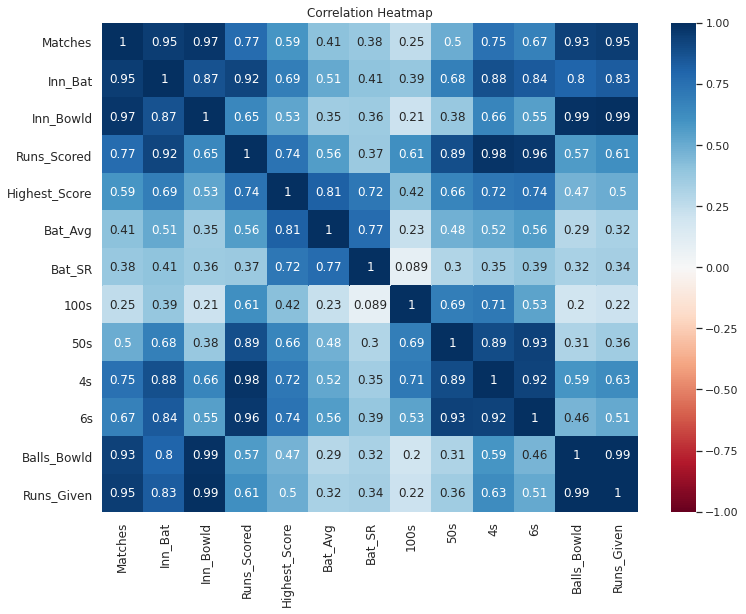

In [ ]:
plt.figure(figsize = (12,9))
s = sns.heatmap(df_segmentation.corr(),
annot = True,
cmap = 'RdBu',
vmin = -1,
vmax = 1)
s.set_yticklabels(s.get_yticklabels(),rotation = 0,fontsize = 12)
s.set_xticklabels(s.get_xticklabels(),rotation =90,fontsize =12)
plt.title('Correlation Heatmap')
plt.show()


Text(0.5, 1.0, 'Vizualization of raw data')

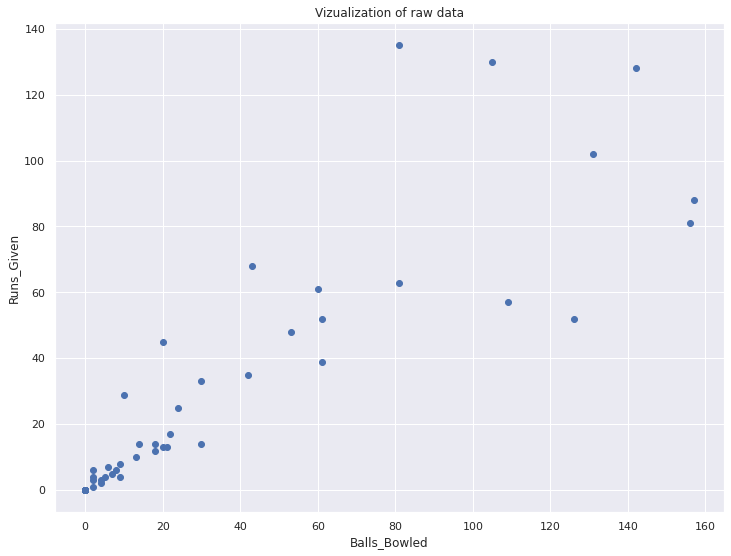

In [ ]:
plt.figure(figsize = (12,9))
plt.scatter(df_segmentation.iloc[:,2],df_segmentation.iloc[:,1])
plt.xlabel('Balls_Bowled')
plt.ylabel('Runs_Given')
plt.title('Vizualization of raw data')

In [ ]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(segmentation_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.explained_variance_ratio_ 

array([6.49560483e-01, 1.59826442e-01, 1.14181078e-01, 3.77701622e-02,
       1.55668005e-02, 1.06351892e-02, 8.19190526e-03, 1.85298838e-03,
       1.42882080e-03, 6.42453757e-04, 2.06691137e-04, 9.32673189e-05,
       4.37184622e-05])

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


matches = pd.read_csv("IPL Matches 2008-2020.csv")


matches=matches[matches["winner"].notna()]

matches["team2"]=matches["team2"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
matches["team1"]=matches["team1"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
matches["winner"]=matches["winner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
matches["toss_winner"]=matches["toss_winner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")

cols = ["team1","team2","toss_winner","venue","toss_decision","winner"]

encoder= LabelEncoder()
matches["team1"]=encoder.fit_transform(matches["team1"])
matches["result"]=encoder.fit_transform(matches["result"])
matches["team2"]=encoder.fit_transform(matches["team2"])
matches["winner"]=encoder.fit_transform(matches["winner"].astype(str))
matches["toss_winner"]=encoder.fit_transform(matches["toss_winner"])
matches["venue"]=encoder.fit_transform(matches["venue"])
matches["toss_decision"]=encoder.fit_transform(matches["toss_decision"])

matches=matches[cols]

X_train, X_test, y_train, y_test = train_test_split(matches.iloc[:,:-1],matches['winner'], test_size=0.2, random_state=0,shuffle=True)


logreg = LogisticRegression(max_iter=12000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
#print('Accuracy of Logistic Regression Classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))

#Decision Tree Classifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)
#print('Accuracy of Decision Tree Classifier on test set: {:.4f}'.format(dtree.score(X_test, y_test)))

#SVM
svm=SVC()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
#print('Accuracy of SVM Classifier on test set: {:.4f}'.format(svm.score(X_test, y_test)))

#Random Forest Classifier
randomForest= RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train,y_train)
y_pred = randomForest.predict(X_test)
ls=["Chennai Super Kings","Mumbai Indians","Mumbai Indians","MA Chidambaram Stadium, Chepauk","bat"]
ls=encoder.fit_transform(ls)
a = randomForest.predict([ls])
print(encoder.inverse_transform(a))
#print('Accuracy of Random Forest Classifier on test set: {:.4f}'.format(randomForest.score(X_test, y_test)))



['Chennai Super Kings']


In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


matches = pd.read_csv("IPL Matches 2008-2020.csv")

'''conditions = [matches["venue"] == "Rajiv Gandhi International Stadium, Uppal",matches["venue"] == "Maharashtra Cricket Association Stadium",
              matches["venue"] == "Saurashtra Cricket Association Stadium", matches["venue"] == "Holkar Cricket Stadium",
              matches["venue"] == "M Chinnaswamy Stadium",matches["venue"] == "Wankhede Stadium",
              matches["venue"] == "Eden Gardens",matches["venue"] == "Feroz Shah Kotla",
              matches["venue"] == "Punjab Cricket Association IS Bindra Stadium, Mohali",matches["venue"] == "Green Park",
              matches["venue"] == "Punjab Cricket Association Stadium, Mohali",matches["venue"] == "Dr DY Patil Sports Academy",
              matches["venue"] == "Sawai Mansingh Stadium", matches["venue"] == "MA Chidambaram Stadium, Chepauk", 
              matches["venue"] == "Newlands", matches["venue"] == "St George's Park" , 
              matches["venue"] == "Kingsmead", matches["venue"] == "SuperSport Park",
              matches["venue"] == "Buffalo Park", matches["venue"] == "New Wanderers Stadium",
              matches["venue"] == "De Beers Diamond Oval", matches["venue"] == "OUTsurance Oval", 
              matches["venue"] == "Brabourne Stadium",matches["venue"] == "Sardar Patel Stadium", 
              matches["venue"] == "Barabati Stadium", matches["venue"] == "Vidarbha Cricket Association Stadium, Jamtha",
              matches["venue"] == "Himachal Pradesh Cricket Association Stadium",matches["venue"] == "Nehru Stadium",
              matches["venue"] == "Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium",matches["venue"] == "Subrata Roy Sahara Stadium",
              matches["venue"] == "Shaheed Veer Narayan Singh International Stadium",matches["venue"] == "JSCA International Stadium Complex",
              matches["venue"] == "Sheikh Zayed Stadium",matches["venue"] == "Sharjah Cricket Stadium",
              matches["venue"] == "Dubai International Cricket Stadium",matches["venue"] == "M. A. Chidambaram Stadium",
              matches["venue"] == "Feroz Shah Kotla Ground",matches["venue"] == "M. Chinnaswamy Stadium",
              matches["venue"] == "Rajiv Gandhi Intl. Cricket Stadium" ,matches["venue"] == "IS Bindra Stadium",matches["venue"] == "ACA-VDCA Stadium"]
values = ['Hyderabad', 'Mumbai', 'Rajkot',"Indore","Bengaluru","Mumbai","Kolkata","Delhi","Mohali","Kanpur","Mohali","Pune","Jaipur","Chennai","Cape Town","Port Elizabeth","Durban",
          "Centurion",'Eastern Cape','Johannesburg','Northern Cape','Bloemfontein','Mumbai','Ahmedabad','Cuttack','Jamtha','Dharamshala','Chennai','Visakhapatnam','Pune','Raipur','Ranchi',
          'Abu Dhabi','Sharjah','Dubai','Chennai','Delhi','Bengaluru','Hyderabad','Mohali','Visakhapatnam']
matches['city'] = np.where(matches['city'].isnull(),
                              np.select(conditions, values),
                              matches['city'])'''

matches=matches[matches["winner"].notna()]

matches["team2"]=matches["team2"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
matches["team1"]=matches["team1"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
matches["winner"]=matches["winner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
matches["toss_winner"]=matches["toss_winner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")

cols = ["team1","team2","toss_winner","venue","toss_decision","result","winner"]

encoder= LabelEncoder()
matches["team1"]=encoder.fit_transform(matches["team1"])
matches["result"]=encoder.fit_transform(matches["result"])
matches["team2"]=encoder.fit_transform(matches["team2"])
matches["winner"]=encoder.fit_transform(matches["winner"].astype(str))
matches["toss_winner"]=encoder.fit_transform(matches["toss_winner"])
matches["venue"]=encoder.fit_transform(matches["venue"])
matches["toss_decision"]=encoder.fit_transform(matches["toss_decision"])

matches=matches[cols]

X_train, X_test, y_train, y_test = train_test_split(matches.iloc[:,:-1],matches['winner'], test_size=0.2, random_state=0,shuffle=True)


logreg = LogisticRegression(max_iter=12000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of Logistic Regression Classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))

#Decision Tree Classifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)
print('Accuracy of Decision Tree Classifier on test set: {:.4f}'.format(dtree.score(X_test, y_test)))

#SVM
svm=SVC()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
print('Accuracy of SVM Classifier on test set: {:.4f}'.format(svm.score(X_test, y_test)))

#Random Forest Classifier
randomForest= RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train,y_train)
y_pred = randomForest.predict(X_test)
print('Accuracy of Random Forest Classifier on test set: {:.4f}'.format(randomForest.score(X_test, y_test)))

Accuracy of Logistic Regression Classifier on test set: 0.2945
Accuracy of Decision Tree Classifier on test set: 0.6074
Accuracy of SVM Classifier on test set: 0.4601
Accuracy of Random Forest Classifier on test set: 0.7362
